In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Download data from kagle

In [ ]:
!pip install kaggle
!pip install pyunpack
!pip install patool

In [ ]:
#upload the credentials
from google.colab import files
files.upload()

In [ ]:

#The Kaggle API client expects the json file to be in ~/.kaggle folder so let’s create a new folder and move it inside.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle

Processing /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10/kaggle-1.5.10-cp36-none-any.whl
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification
#Let’s see the imported files:
!ls

covid-19-nlp-text-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#put file name and the dic to store file 
from pyunpack import Archive
Archive('covid-19-nlp-text-classification.zip').extractall('/content/gdrive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab')

In [ ]:
import pandas as pd
import pandas as pd
df_movies_train = pd.read_csv("/content/gdrive/MyDrive/Entity_extarction_aftab/experi-different-model-aftab/Corona_NLP_train.csv",encoding = "ISO-8859-1",usecols=['OriginalTweet','Sentiment'])
df_movies_train.head(20)


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
7,Was at the supermarket today. Didn't buy toile...,Neutral
8,Due to COVID-19 our retail store and classroom...,Positive
9,"For corona prevention,we should stop to buy th...",Negative


In [ ]:
!pip install contractions

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import re
import nltk
import contractions
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Data analysis

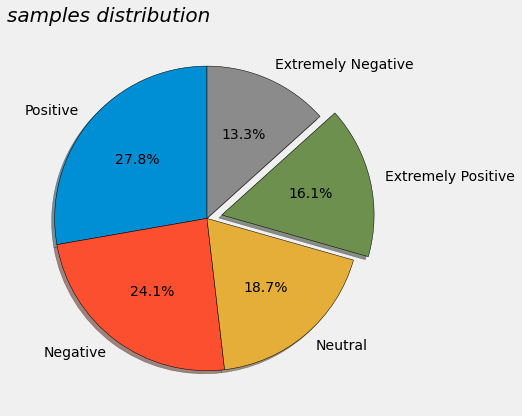

In [ ]:
values=df_movies_train['Sentiment'].value_counts()
class_size=values.tolist()

plt.style.use("fivethirtyeight")

# Language Popularity
slices = class_size
labels = ['Positive','Negative','Neutral','Extremely Positive','Extremely Negative']

fig = plt.figure(1, figsize=(7,6))
ax = fig.add_subplot(111)
ax.axis('equal')
expode=[0,0,0,0.1,0]

ax.pie(slices,labels=labels,wedgeprops={'edgecolor': 'black'},
        autopct='%1.1f%%',explode=expode,shadow=True, startangle=90,)

plt.title(label="samples distribution", 
          loc="left", 
          fontstyle='italic',
          fontsize=20
          ) 
plt.tight_layout()

plt.show()


In [ ]:
#check null value
df_movies_train.isna().sum()


OriginalTweet    0
Sentiment        0
dtype: int64

In [ ]:
#check duplicate values
def remove_duplicate(dataframe):
  duplicate = dataframe[dataframe.duplicated()]
  if len(duplicate) !=0:
    dataframe.drop_duplicates(keep='first',inplace=True)
  else:
    pass
  return dataframe
df_movies_train=remove_duplicate(df_movies_train)

In [ ]:
label_datf=df_movies_train['Sentiment'].copy()
label_datf.head(10)

0               Neutral
1              Positive
2              Positive
3              Positive
4    Extremely Negative
5              Positive
6              Positive
7               Neutral
8              Positive
9              Negative
Name: Sentiment, dtype: object

In [ ]:
# merg postive and Extremely Positive & Negative and Extremely Negative
dictionary={'Neutral':'Neutral','Positive':'Positive','Extremely Positive':'Positive','Negative':'Negative','Extremely Negative':'Negative'     
}
df_movies_train['Sentiment']=df_movies_train['Sentiment'].map(dictionary)

df_movies_train.head(20)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative
5,As news of the regionÂs first confirmed COVID...,Positive
6,Cashier at grocery store was sharing his insig...,Positive
7,Was at the supermarket today. Didn't buy toile...,Neutral
8,Due to COVID-19 our retail store and classroom...,Positive
9,"For corona prevention,we should stop to buy th...",Negative


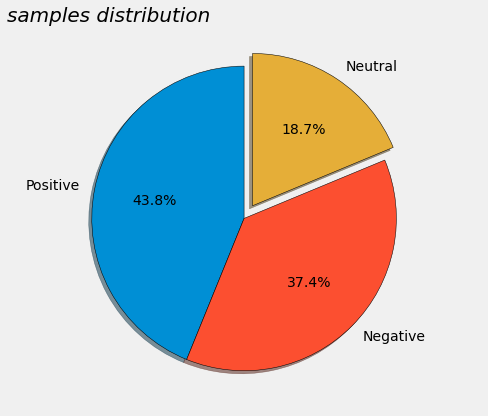

In [ ]:
# samples distribution among differnt classes 
values=df_movies_train['Sentiment'].value_counts()
class_size=values.tolist()

plt.style.use("fivethirtyeight")

# Language Popularity
slices = class_size
labels = ['Positive','Negative','Neutral']

fig = plt.figure(1, figsize=(7,6))
ax = fig.add_subplot(111)
ax.axis('equal')
expode=[0,0,0.1]

ax.pie(slices,labels=labels,wedgeprops={'edgecolor': 'black'},
        autopct='%1.1f%%',explode=expode,shadow=True, startangle=90,)

plt.title(label="samples distribution", 
          loc="left", 
          fontstyle='italic',
          fontsize=20
          ) 
plt.tight_layout()
plt.show()

## Data preprocessing

In [ ]:
import string
def data_pre_processing(data):
  corpus = []
  fillerWord = ("so","yeah","okay","um","uh","mmm","ahan","uh","huh","ahm","oh","sooo","uh","huh","yeh","yah","hmm","bye")
  fillerword_reg= "bye[.,]|so[.,]|yeah[.,]|okay[.,]|um[.,]|uh[.,]|mmm[.,]|ahan[.,]|uh[.,]|huh[.,]|ahm[.,]|oh[.,]|sooo[.,]|uh[.,]|huh[.,]|yeh[.,]|yah[.,]|hmm[.,]"
  STOPWORDS = set(stopwords.words('english'))
  STOPWORDS.add(fillerWord)  
  for i in range(len(data)):
      review = re.sub("#", "", data[i])
      review = re.sub(r'^https?:\/\/.*[\r\n]*', '',review, flags=re.MULTILINE)
      html=re.compile(r'<.*?>')
      review =html.sub(r"", review)
      review=re.sub(r'@\w+',"",review)
      review=re.sub(r'#\w+',"",review) 
      review=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', review) 
      punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
      review.rstrip(string.punctuation)
      review=re.sub('[^A-Za-z\s]+',"", review)
      review = review.lower()
      review = review.split()
      review = [lemmatizer.lemmatize(word) for word in review if not word in STOPWORDS]
      review = ' '.join(review)
      filler=re.compile(fillerword_reg)
      review=filler.sub("",review)
      corpus.append(review)
  return corpus



In [ ]:
# data pre-processing for tranning 
text_data=df_movies_train['OriginalTweet'].tolist()
process_text=data_pre_processing(text_data)
#process_text= list(filter(None, process_text))
df_train_process_text=pd.DataFrame(process_text)

In [ ]:
df_train_process_text.columns=['OriginalTweet']
df_train_process_text.head()

,OriginalTweet
0,
1,advice talk neighbour family exchange phone nu...
2,coronavirus australia woolworth give elderly d...
3,food stock one empty please dont panic enough ...
4,ready go supermarket covid outbreak im paranoi...


In [ ]:
#check dimensions after pre-processing of traning data 
print(df_movies_train.shape)
print(df_train_process_text.shape)

(41157, 2)
(41157, 1)


In [ ]:
# Data concatnate 
Data_tarning=pd.concat([df_train_process_text,df_movies_train['Sentiment']],axis=1)

In [ ]:
#drop nun values 
nan_value = float("NaN")
Data_tarning.replace("", nan_value, inplace=True)
Data_tarning.dropna(inplace=True)


In [ ]:
dictionary={'Neutral':1,'Positive':2,'Negative':0}
Data_tarning['Sentiment']=Data_tarning['Sentiment'].map(dictionary)

In [ ]:
Data_tarning[250:300]


,OriginalTweet,Sentiment
254,mpe prepared continue providing safe reliable ...,2
255,binge shopping online quarantinelife coronavirus,1
256,long time could dream reid distillery would lo...,2
257,way coronavirus changing millennials money hab...,1
258,im getting personal im one allow coronavirus h...,0
259,panic shopping coronavirus planning doesnt end...,0
260,hello brother sister let connect hand support ...,2
261,social distancing prevent spread coronavirus c...,0
262,woolworth give elderly disabled dedicated shop...,2
263,man yelled supermarket today buying yucky garl...,2


## Project1: ML Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# initialize our Bag of Word Model
vectorizer = CountVectorizer(max_features= 3000, min_df = 3, max_df = 0.6)
# fit the model for tranning data
X_data_train = vectorizer.fit_transform(Data_tarning['OriginalTweet'])
y_label_train=Data_tarning['Sentiment']

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_train_tfid = transformer.fit_transform(X_data_train).toarray()

print(X_train_tfid.shape)
print(y_label_train.shape)

(41047, 3000)
(41047,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfid, y_label_train, test_size=0.33, random_state=42)

In [ ]:
#NB
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train,y_train)
prediction = classifier.score(X_test,y_test )
print(prediction)

0.6684630149121512


In [ ]:
#ada boost 
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train,y_train)
prediction = clf.score(X_test,y_test )
print(prediction)


0.6633692602982431


In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier 
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf.fit(X_train,y_train)
prediction = clf.score(X_test,y_test )
print(prediction)

0.7053742802303263


In [ ]:
# RF 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[3568  518  977]
 [ 651 1412  504]
 [1092  555 4269]]
0.6827845858556031
              precision    recall  f1-score   support

           0       0.67      0.70      0.69      5063
           1       0.57      0.55      0.56      2567
           2       0.74      0.72      0.73      5916

    accuracy                           0.68     13546
   macro avg       0.66      0.66      0.66     13546
weighted avg       0.68      0.68      0.68     13546



### Hyper parameters tunning RF

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [1,3,4,5,7,9,10]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)
print(rf_randomcv.best_params_)
print(rf_randomcv)
#print(rf_randomcv.best_estimator_)
best_random_grid=rf_randomcv.best_estimator_
print(best_random_grid)


In [ ]:

from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:{}".format(classification_report(y_test,y_pred)))


[[3681  274 1108]
 [ 462 1333  772]
 [ 687  241 4988]]
Accuracy Score 0.7383729514247749
Classification report:              precision    recall  f1-score   support

           0       0.76      0.73      0.74      5063
           1       0.72      0.52      0.60      2567
           2       0.73      0.84      0.78      5916

    accuracy                           0.74     13546
   macro avg       0.74      0.70      0.71     13546
weighted avg       0.74      0.74      0.73     13546



## Project1:Deep learning model (neural network)

In [ ]:
Data_tarning.head()

,OriginalTweet,Sentiment
1,advice talk neighbour family exchange phone nu...,Positive
2,coronavirus australia woolworth give elderly d...,Positive
3,food stock one empty please dont panic enough ...,Positive
4,ready go supermarket covid outbreak im paranoi...,Negative
5,news region first confirmed covid case came su...,Positive


In [ ]:
values=Data_tarning['Sentiment'].value_counts()
print(values)
class_size=values.tolist()

Positive    18011
Negative    15378
Neutral      7658
Name: Sentiment, dtype: int64


In [ ]:
Data_tarning['Sentiment']

1        Positive
2        Positive
3        Positive
4        Negative
5        Positive
           ...   
41152     Neutral
41153    Negative
41154    Positive
41155     Neutral
41156    Negative
Name: Sentiment, Length: 41047, dtype: object

In [ ]:
# Categorical label encoding 
#train_labe_nn=pd.get_dummies(Data_tarning['Sentiment'],drop_first=True)
train_labe_nn=pd.get_dummies(Data_tarning['Sentiment'])
train_labe_nn.head()

In [ ]:
# Count Vectorizer and TFIDF
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000, min_df = 3, max_df = 0.6)
X_data_train = vectorizer.fit_transform(Data_tarning['OriginalTweet'])
y_label_train=train_labe_nn
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_train_tfid = transformer.fit_transform(X_data_train).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_tfid, y_label_train, test_size=0.2, random_state=42)


### class weight for data inbalance 

In [ ]:
class_weights = {0:1.5,  
                  1:2.5,
                 2:1,
                 }

####Model



In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(50, kernel_initializer='uniform', activation='relu',input_dim=1000))
classifier.add(Dropout(0.3))

#adding the second hidden layer
classifier.add(Dense(30, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(10, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.2))

#adding the output layer
classifier.add(Dense(3, kernel_initializer='uniform', activation='softmax'))

classifier.compile(optimizer="Adam", loss='kullback_leibler_divergence', metrics=['accuracy'])

classifier.fit(X_train,y_train, batch_size=30, epochs=30,class_weight=class_weights)


Epoch 1/30
1095/1095 [==============================] - 3s 2ms/step - loss: 1.4645 - accuracy: 0.5116
Epoch 2/30
1095/1095 [==============================] - 2s 2ms/step - loss: 1.1403 - accuracy: 0.6818
Epoch 3/30
1095/1095 [==============================] - 2s 2ms/step - loss: 1.0343 - accuracy: 0.7110
Epoch 4/30
1095/1095 [==============================] - 2s 2ms/step - loss: 0.9809 - accuracy: 0.7338
Epoch 5/30
1095/1095 [==============================] - 2s 2ms/step - loss: 0.9425 - accuracy: 0.7469
Epoch 6/30
1095/1095 [==============================] - 2s 2ms/step - loss: 0.9010 - accuracy: 0.7625
Epoch 7/30
1095/1095 [==============================] - 3s 2ms/step - loss: 0.8889 - accuracy: 0.7654
Epoch 8/30
1095/1095 [==============================] - 2s 2ms/step - loss: 0.8358 - accuracy: 0.7822
Epoch 9/30
1095/1095 [==============================] - 2s 2ms/step - loss: 0.8135 - accuracy: 0.7886
Epoch 10/30
1095/1095 [==============================] - 2s 2ms/step - loss: 0.790

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), target_names=['Class Negative', 'Class Neutral','Class postive']))


Classification Report

                precision    recall  f1-score   support

Class Negative       0.69      0.74      0.72      3084
 Class Neutral       0.56      0.64      0.59      1549
 Class postive       0.81      0.71      0.75      3577

      accuracy                           0.71      8210
     macro avg       0.69      0.69      0.69      8210
  weighted avg       0.72      0.71      0.71      8210



In [ ]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
cm =confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[2290,  382,  412],
       [ 374,  984,  191],
       [ 644,  404, 2529]])

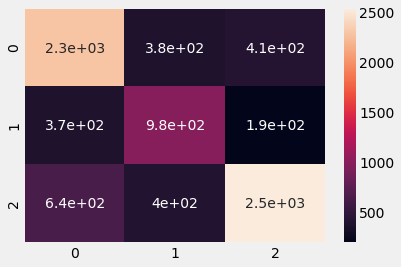

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

## Project2: without merging extremely positive & extremely positive classes 

In [ ]:
df_movies_train.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
#check duplicate values
df_movies_train=remove_duplicate(df_movies_train)
df_movies_train.head()

In [ ]:
# data pre-processing for tranning 
text_data=df_movies_train['OriginalTweet'].tolist()
process_text=data_pre_processing(text_data)
#process_text= list(filter(None, process_text))
df_train_process_text=pd.DataFrame(process_text)

In [ ]:
df_train_process_text.columns=['OriginalTweet']
df_train_process_text.head()

,OriginalTweet
0,
1,advice talk neighbour family exchange phone nu...
2,coronavirus australia woolworth give elderly d...
3,food stock one empty please dont panic enough ...
4,ready go supermarket covid outbreak im paranoi...


In [ ]:
#check dimensions after pre-processing of traning data 
print(df_movies_train.shape)
print(df_train_process_text.shape)

(41157, 2)
(41157, 1)


In [ ]:
# Data concatnate 
Data_tarning=pd.concat([df_train_process_text,df_movies_train['Sentiment']],axis=1)

In [ ]:
#drop nun values 
nan_value = float("NaN")
Data_tarning.replace("", nan_value, inplace=True)
Data_tarning.dropna(inplace=True)
Data_tarning.head()

,OriginalTweet,Sentiment
1,advice talk neighbour family exchange phone nu...,Positive
2,coronavirus australia woolworth give elderly d...,Positive
3,food stock one empty please dont panic enough ...,Positive
4,ready go supermarket covid outbreak im paranoi...,Extremely Negative
5,news region first confirmed covid case came su...,Positive


In [ ]:
train_labe_nn=pd.get_dummies(Data_tarning['Sentiment'])
train_labe_nn.head()

,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,1,0,0,0,0
5,0,0,0,0,1


In [ ]:
# Count Vectorizer and TFIDF
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000, min_df = 3, max_df = 0.6)
X_data_train = vectorizer.fit_transform(Data_tarning['OriginalTweet'])
y_label_train=train_labe_nn
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_train_tfid = transformer.fit_transform(X_data_train).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfid, y_label_train, test_size=0.2, random_state=42)

## Class weight for data inbalance

In [ ]:
class_weights = {0:3,  
                  1:2.5,
                 2:2,
                 3:1.5,
                 4:1.0}

## Model

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(75, kernel_initializer='uniform', activation='relu',input_dim=1000))
classifier.add(Dropout(0.3))

#adding the second hidden layer
classifier.add(Dense(50, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(Dense(10, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.3))

#adding the output layer
classifier.add(Dense(5, kernel_initializer='uniform', activation='softmax'))

classifier.compile(optimizer="Adam", loss='kullback_leibler_divergence', metrics=['accuracy'])


classifier.fit(X_train,y_train, batch_size=30, epochs=50,class_weight=class_weights)


Epoch 1/50
1095/1095 [==============================] - 3s 2ms/step - loss: 2.7609 - accuracy: 0.2593
Epoch 2/50
1095/1095 [==============================] - 3s 2ms/step - loss: 2.1709 - accuracy: 0.4003
Epoch 3/50
1095/1095 [==============================] - 3s 2ms/step - loss: 2.0801 - accuracy: 0.4786
Epoch 4/50
1095/1095 [==============================] - 3s 2ms/step - loss: 2.0202 - accuracy: 0.4979
Epoch 5/50
1095/1095 [==============================] - 3s 2ms/step - loss: 1.9474 - accuracy: 0.5213
Epoch 6/50
1095/1095 [==============================] - 3s 2ms/step - loss: 1.9059 - accuracy: 0.5308
Epoch 7/50
1095/1095 [==============================] - 3s 2ms/step - loss: 1.8282 - accuracy: 0.5495
Epoch 8/50
1095/1095 [==============================] - 3s 3ms/step - loss: 1.7695 - accuracy: 0.5692
Epoch 9/50
1095/1095 [==============================] - 3s 3ms/step - loss: 1.7111 - accuracy: 0.5851
Epoch 10/50
1095/1095 [==============================] - 3s 2ms/step - loss: 1.664

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test.values.argmax(axis=1), y_pred.argmax(axis=1), target_names=['class Extremely Negative',	'class Extremely Positive','Class Negative', 'Class Neutral','Class postive']))


Classification Report

                          precision    recall  f1-score   support

class Extremely Negative       0.39      0.49      0.43      1114
class Extremely Positive       0.62      0.61      0.62      1283
          Class Negative       0.43      0.55      0.48      1970
           Class Neutral       0.59      0.53      0.56      1549
           Class postive       0.55      0.41      0.47      2294

                accuracy                           0.51      8210
               macro avg       0.52      0.52      0.51      8210
            weighted avg       0.52      0.51      0.51      8210

